In [19]:
import numpy as np
from tqdm import tqdm
from numba import jit,njit
import pandas as pd
import json
import matplotlib.pyplot as plt

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
#from derivative import dxdt
import pandas as pd

import numpy as np
from scipy.integrate import odeint
from scipy.optimize import minimize
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt


In [20]:
global N_total

def damage_Rate(a,b,time,N_individual):
    return (1- (N_individual/N_total))*a*(1 + b*time)

def repair_Rate(r,s,time, N_individual):
    return (N_individual/N_total)*r*(1 - s*time)

def mortality_Rate(mu, C, N_individual):
    return mu*(N_individual/N_total)**C

def modelo_constitutivo(a,b,r,s, mu, C, time, N_individual):

    damare_Rate_propensity = damage_Rate(a,b,time, N_individual)
    Repair_Rate_propensity = repair_Rate(r,s,time, N_individual)
    Mortality_Rate_propensity = mortality_Rate(mu, C, N_individual)
    return damare_Rate_propensity, Repair_Rate_propensity, Mortality_Rate_propensity, 


In [24]:
def Gillespie(trp0,tmax):
    """
    Esta funcion se emplea solamente para hacer la evolución de un paso individual en el individuo. Evoluciona no un paso temporal, 
    pero si temporalmente la cantidad de veces que pueda evolucionar antes del tmax en una corrida
    """

    time , N_individual, died  =trp0 

    a = 0.2
    b = 0.09
    r = 0.2
    s = 0.01
    C = 2.87
    mu = 1

    while time < tmax and not died:
        s_1, s_2, s_3  =  modelo_constitutivo(a,b,r,s, mu, C, time, N_individual)
        S_T = s_1 + s_2 + s_3 
        tasa_maxima = a + r 

        if np.random.rand() < np.abs(tasa_maxima - S_T)/tasa_maxima:
            τ = (-1/tasa_maxima)*np.log(np.random.rand())
            x = np.random.rand()
            time+=τ

            if x <= (s_1)/S_T:
                N_individual += 1

            elif x<= (s_1 + s_2)/S_T:
                N_individual -= 1
            
            else: 
                died = True
                return np.array([time, N_individual, died ]) 
        
    return np.array([time, N_individual, died ]) 

def Estado_celula(X0,tiempos):

    X = np.zeros((len(tiempos),len(X0)))
    X[0] = X0
    
    for i in range(1,len(tiempos)):
        X[i] = Gillespie(X[i-1],tiempos[i])
    
    return X

N_total = 1000
x0 = np.array([0., N_total*0.1, 0.])

num_cel = 1000 #número de células 
celulas = np.array([Estado_celula(x0,np.arange(0.,10000.,1.)) for i in tqdm(range(num_cel))])

suma = np.nansum(celulas[:, :, 1], axis=0)

longitud_valida = np.sum(~np.isnan(celulas[:, :, 1]), axis=0)

promedio_curva_frailty_index = np.divide(suma, longitud_valida, out=np.zeros_like(suma), where=longitud_valida != 0)

plt.plot(promedio_curva_frailty_index/N_total)


KeyboardInterrupt: 

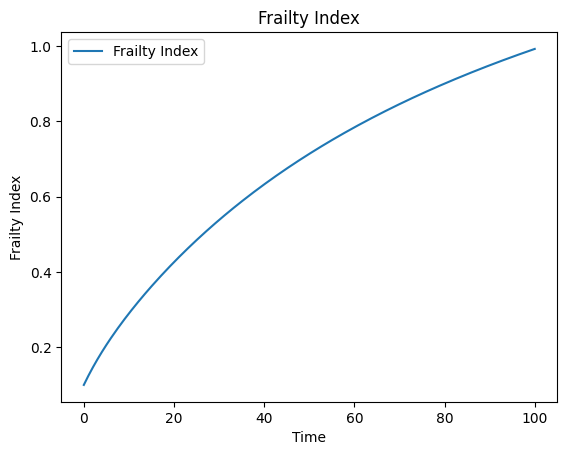

In [14]:
# Differential equation of the frailty index
def frailty_index_differential_equation(f, t, a, b, r, s):
    dfdt = a * (1 - f) * (1 + b * t) - f * r * (1 - s * t)
    return dfdt

# Time points
t = np.linspace(0, 100, 200)  # 100 time steps from 0 to 10

# Default initial conditions and parameters
f0 = 0.1

a = 0.05
b = 0.09
r = 0.2
s = 0.01
C = 2.87
mu = 1

f_solution = odeint(frailty_index_differential_equation, f0, t, args=(a, b, r, s)) #Solution of the differential equation using Odeint




